In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [2]:
#Loading the data 
data = pd.read_csv('parkinsons.csv')

In [3]:
#Eye-balling data
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#The data has 24 columns with different attributes. 
#These are explained in the Attribute information below

#name - ASCII subject name and recording number

#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency

#MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP 
#Several measures of variation in fundamental frequency

#MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA 
#Several measures of variation in amplitude 

#NHR,HNR - Two measures of ratio of noise to tonal components in the voice

#status - Health status of the subject (one) - Parkinson's, (zero) - healthy

#RPDE,D2 - Two nonlinear dynamical complexity measures

#DFA - Signal fractal scaling exponent

#spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation 


In [5]:
data.shape

(195, 24)

In [6]:
#195 different recordings (rows) exist for these 24 attributes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#Except for status and name, all other attributes are floating type. 
#Status is integer and Name is an object

In [9]:
#Re-Checing the presence of null-values
print(data.isnull().values.any())


False


In [10]:
#No Null Values in the data set

In [11]:
#Moving status column to the last
df1=data.pop('status') 
data['status'] = df1

In [12]:
# dropping name column as this attribute is not of much significance 
data = data.drop('name',axis=1)

In [13]:
data.describe().transpose()
#This is a summary table to show the spread of all attributes

#The mean of average vocal fundamental frequency is 154.2 Hz. With cases ranging from 88 Hz to 260 Hz.
#The mean of average maximum vocal fundamental frequency in Dataset is 197 Hz with max frequency being 592 Hz and min of 102 Hz.
#The mean of average minimum vocal fundamental frequency in Dataset is 116 Hz with max frequency being 239 Hz and min of 65 Hz

#A Uni-Variate and Bi-Variate analysis of attrbitues to follow.

#A noteoworthy point is that over 75% of recordings in the dataset are of the patients suffering from PD (Status attribute)
#The non-PD patients are under-represented in the dataset (esp. since way less than 75 % the population suffers from PD )
#Source: https://www.parkinson.org/Understanding-Parkinsons/Statistics#:~:text=Who%20Has%20Parkinson's%3F&text=Approximately%2060%2C000%20Americans%20are%20diagnosed,are%20diagnosed%20before%20age%2050. 

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [14]:
data.status.value_counts()
# Out of 195 people in dataset, 147 people are affected with Parkinson's Disease

1    147
0     48
Name: status, dtype: int64

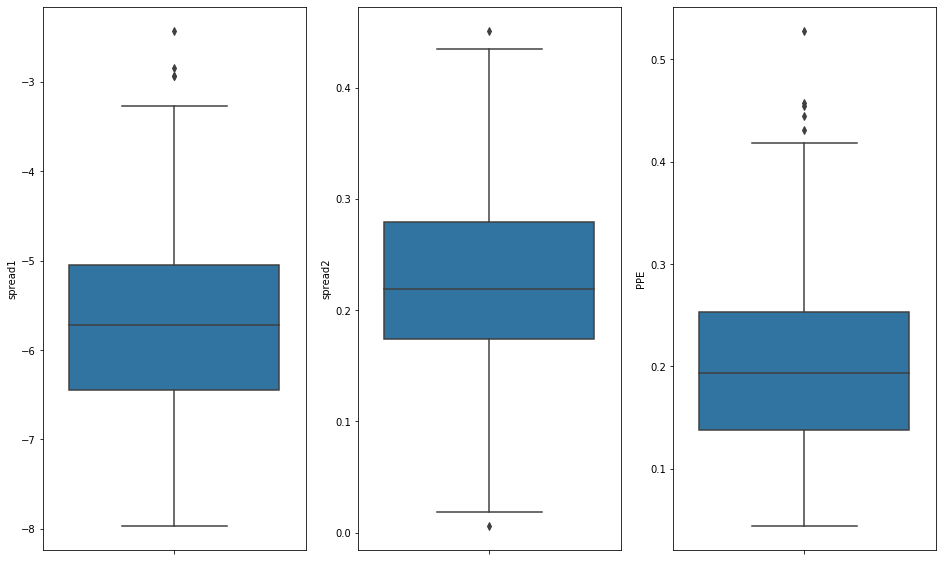

In [15]:
##Univariate Analysis for attributes

fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=data, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=data, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=data,ax=ax[2],orient='v')


In [16]:
#The above figure shows the box plot of the frequency variation. 
#All the three variations have few outliers. 
#Generally speaking, decision trees are able to handle outliers. It is very unlikely that decision tree will create a leaf to isolate them

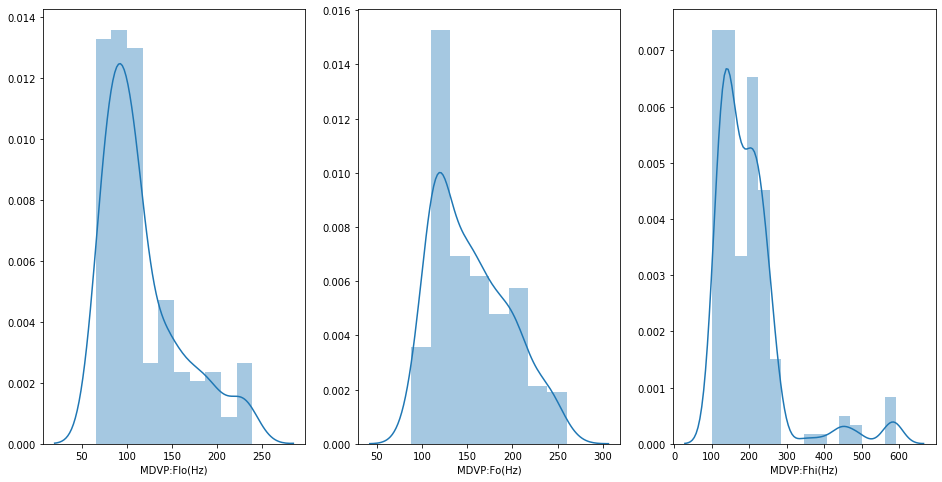

In [17]:
#Uni-variate analysis of vocal fundamental frequencies (MDVP)

fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

#As seen from the measures of vocal fundamental frequency shown below:
# 1. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. 
# 2. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. 
# 3. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

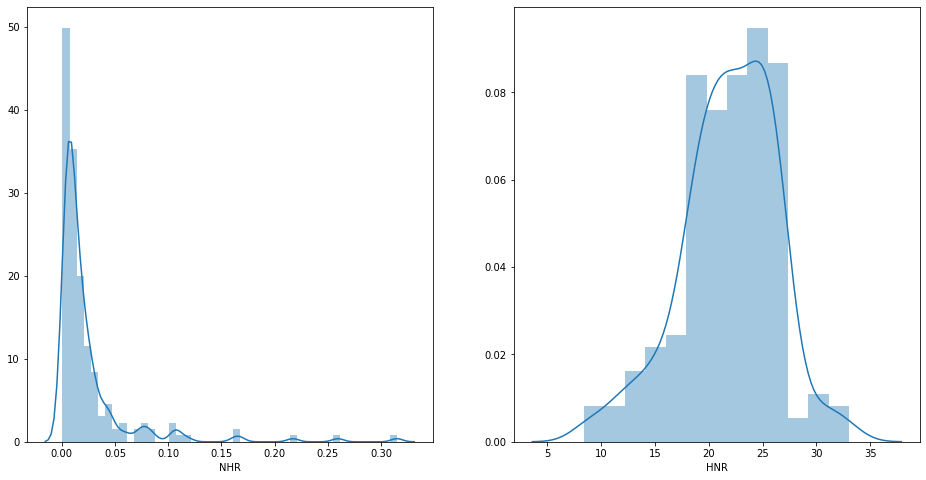

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(data['NHR'],ax=ax[0]) 
sns.distplot(data['HNR'],ax=ax[1])

#The measure of tonal component of frequency is shown below. 
#The value NHR is right skewed and there are lot of observations in the area, but they seem to be with very minimal values. 
#The maximum number of observations is between 0 and 0.04. 
#The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

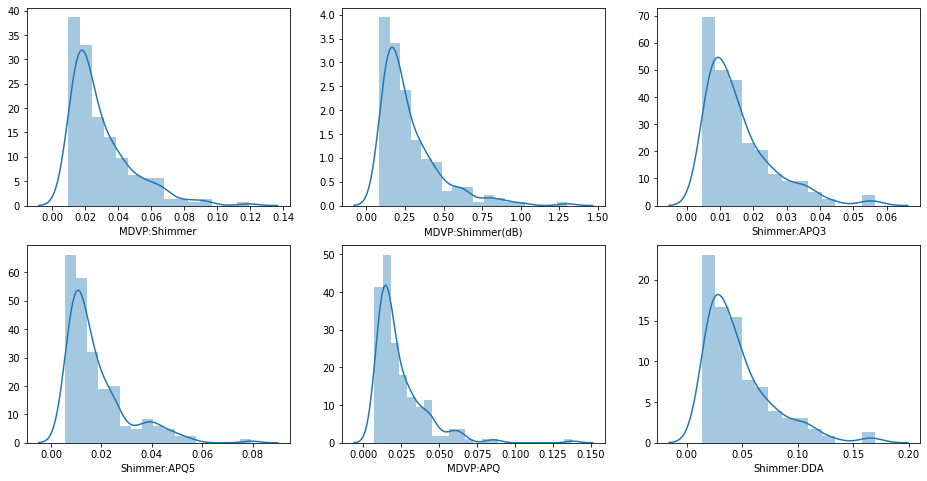

In [19]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2])

#For all of the below graphs, we can observe that the measure of variation in amplitude is positively skewed

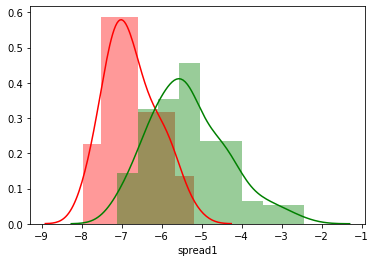

In [20]:
##Bi-Variate Analysis

sns.distplot( data[data.status == 0]['spread1'], color = 'r')
sns.distplot( data[data.status == 1]['spread1'], color = 'g')

#Spread1 is normally distributed between people who have Parkinson's disease and people who are normal. 
#People with spread1 between - 8.5 and -7.5 are more in numbers and they are normal. 
#People whose spread1 is between -6.5 and -5 are having Parkinson's disease

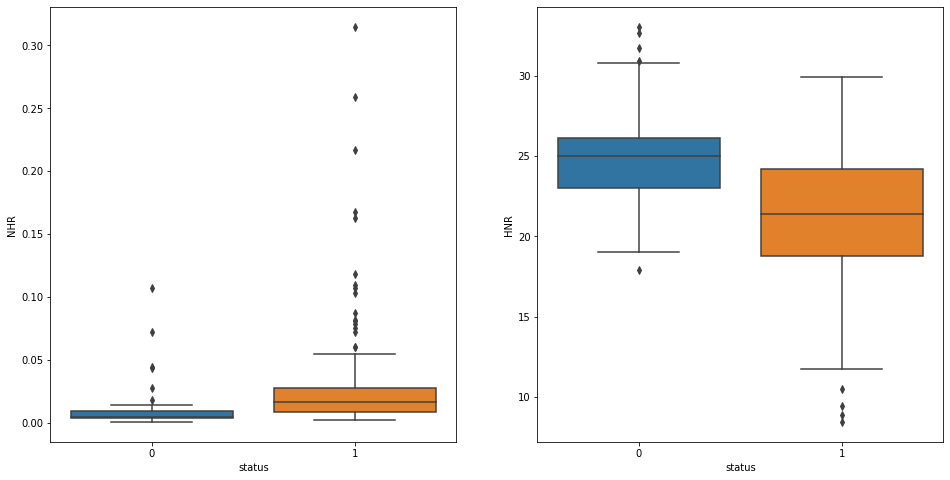

In [21]:
#Exploring relationship between variables

fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=data,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=data,ax=ax[1])

#People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. 
#Also, looking at the HNR ratio, people who have Parkinson's have lower levels of HNR.

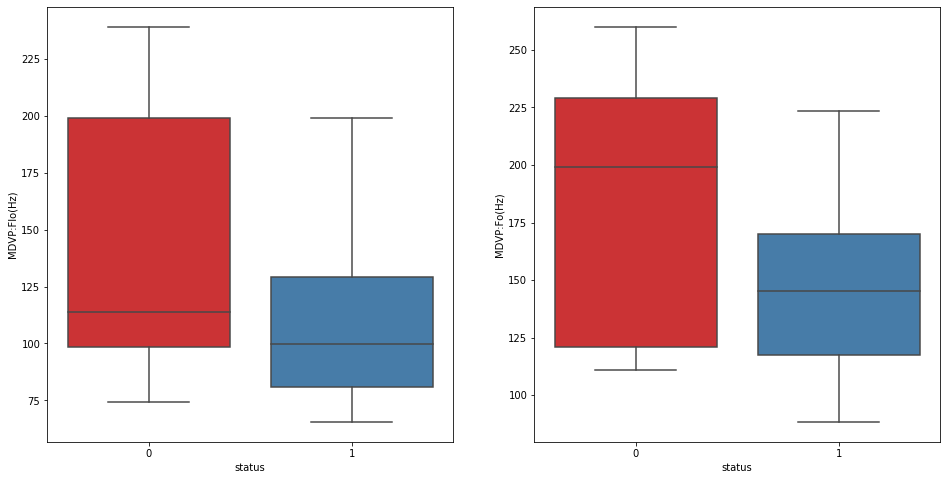

In [22]:
#Exploring relationship between variables

fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])

#When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz 
#for people who are normal. 

#For people who are affected with Parkinsons the median value comes around 145 Hz

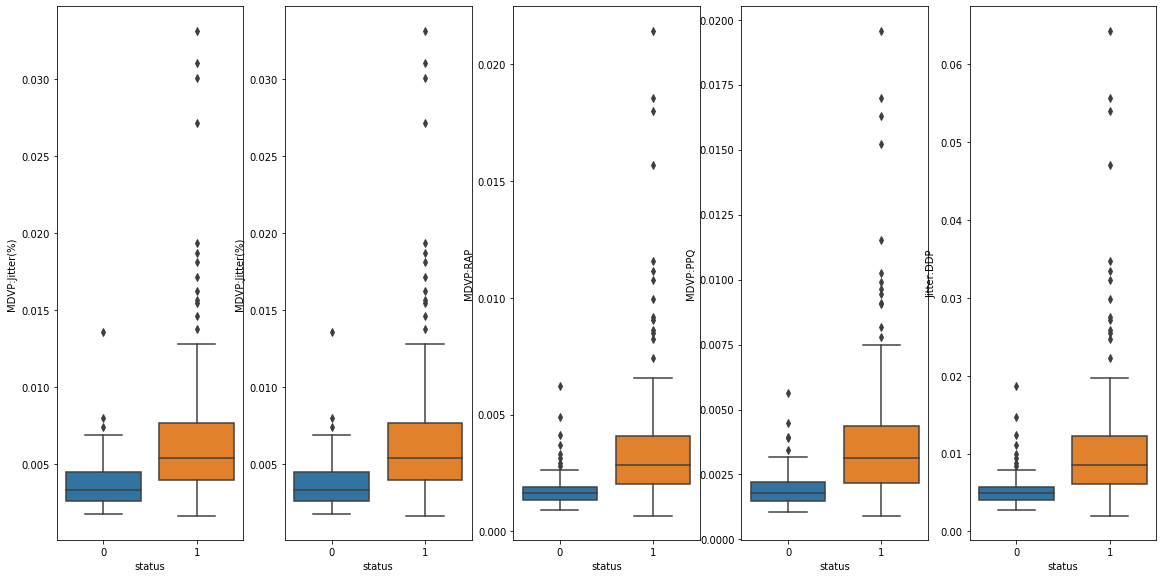

In [23]:
# For categorical predictors

cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])
    
#People who are suffering for PD tend to have higher jitter %. 
#It seems if the values goes above 0.15 we can confirm the patient is having PD. 
#The variation of fundamental frequency is in a low range for people who is normal.

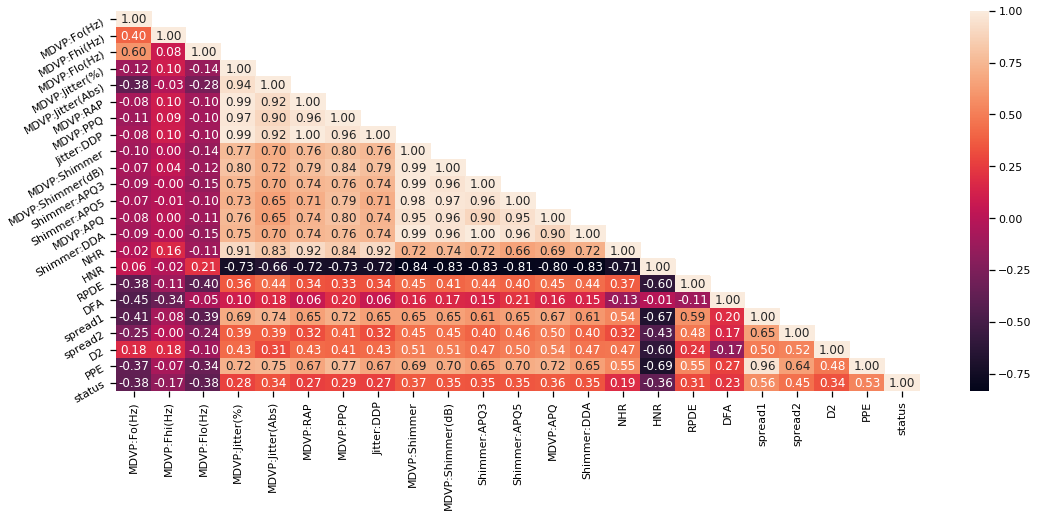

In [24]:
##Correlation comparision with heat map

corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))

# creating a mask so that the correlation values are shown only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP

#MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA 
#this may be because they are related to each other. 
#This may be because multi-dimensinal voice programs analysis is closely related with these variables

#The target variable status has a weak positive corelation with spread1

In [25]:
##Applying Models

In [26]:
#Decision Tree
#Decision trees can be used to predict both continuous and discrete values 
#i.e. they work well for both regression and classification tasks.

from sklearn import metrics
X = data.drop("status",axis=1)
Y = data["status"]

In [27]:
# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [28]:
# Applying decision tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [30]:
dt_model.score(X_test , y_test) 

0.8983050847457628

In [31]:
y_pred = dt_model.predict(X_test)

In [32]:
confusion_matrix(y_test,y_pred)

array([[11,  4],
       [ 2, 42]], dtype=int64)

In [33]:
#Count mis-classified one
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 6


In [34]:
#Decision Tree has accuracy of 89% on test data (59 records)
#There are 6 misclassified samples (FP and FN)
#53 samples are correctly classified (TP and TN)

In [35]:
#Building visual representation of Decision Tree

from IPython.display import Image
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.113981
MDVP:Fhi(Hz)      0.196589
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.073695
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.056276
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.205876
spread2           0.000000
D2                0.000000
PPE               0.353584


In [36]:
# We can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view

In [37]:
#Scaling Data

trainingData = preprocessing.scale(X_train)
testData = preprocessing.scale(X_test)

# Running the logistic regression
logReg = LogisticRegression()
logReg.fit(trainingData, y_train)
pred = logReg.predict(testData)
logReg_score = logReg.score(testData, y_test)
print('logReg_score: ' , logReg_score)
accuracy = logReg.score(testData, y_test) * 100
accuracies = {}
accuracies['LR'] = accuracy
print('Logistic Regression Accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, pred))

logReg_score:  0.864406779661017
Logistic Regression Accuracy:  86.4406779661017
Confusion Matrix: 
[[ 9  6]
 [ 2 42]]


In [38]:
#Logistic Regression has accuracy of 86% on test data (59 records)
#There are 8 misclassified samples (FP and FN)
#51 samples are correctly classified (TP and TN)

In [39]:
#Running Naive Bayes

nb = GaussianNB()
nb.fit(trainingData, y_train)
expected  = y_test
predicted = nb.predict(testData)
print(metrics.classification_report(expected, predicted))
accuracy = (metrics.accuracy_score(expected, predicted))*100
accuracies['NB'] = accuracy
print('Naive Bayes accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.86      0.84      0.85        44

    accuracy                           0.78        59
   macro avg       0.71      0.72      0.72        59
weighted avg       0.78      0.78      0.78        59

Naive Bayes accuracy:  77.96610169491525
Confusion Matrix: 
[[ 9  6]
 [ 7 37]]


In [40]:
#GaussianNB has accuracy of 78% on test data (59 records)
#There are 13 misclassified samples (FP and FN)
#46 samples are correctly classified (TP and TN)

In [41]:
#Running KNN
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

expected  = y_test
predicted = k_model.predict(X_test)
y_pred = k_model.predict(X_test)
accuracy = (metrics.accuracy_score(y_test, predicted))*100

accuracies['KNN'] = accuracy
print('KNN accuracy: ', accuracy)
print('\nConfusion Matrix: ')
print(metrics.confusion_matrix(y_test, predicted))
count_misclassified = (y_test != y_pred).sum()
print('\nMisclassified samples in KNN: {}'.format(count_misclassified))

KNN accuracy:  83.05084745762711

Confusion Matrix: 
[[ 8  7]
 [ 3 41]]

Misclassified samples in KNN: 10


In [42]:
#KNN has accuracy of 83% on test data (59 records)
#There are 10 misclassified samples (FP and FN)
#49 samples are correctly classified (TP and TN)

In [43]:
#Running SVM
from sklearn import svm

svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(trainingData, y_train)
svm.score(testData, y_test)
predicted = svm.predict(testData)
accuracy = (metrics.accuracy_score(y_test, predicted))*100
accuracies['SVM'] = accuracy
print('Support Vector Machines accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, predicted))

Support Vector Machines accuracy:  88.13559322033898
Confusion Matrix: 
[[ 8  7]
 [ 0 44]]


In [44]:
#SVM has accuracy of 88% on test data (59 records)
#There are 7 misclassified samples ( All FN)
#51 samples are correctly classified (TP and TN)

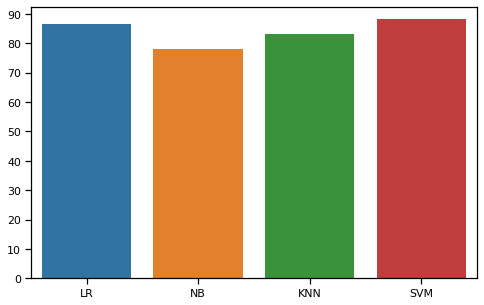

In [45]:
#Plotting the performace of all 4 Supervised Learning Models as done above. NB performs the worst
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

#The graph shows higest accuracy of SVM - however, SVM has a very high number of False Negatives
#In healthcare, False Negative needs to be minimized to zero as it means the patient had PD but was not diagnosed
#Hence, despite high accuracy, SVM might not be the mdoel fo choice - proceeding to Meta-Classifiers and Ensemble Techniques

In [46]:
##Meta-Classifier with LR as Level-2 classifier and KNN, NB and RFC as Level-1 classifiers

from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = LogisticRegression(max_iter=400)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(random_state=1)

sclf = StackingClassifier(classifiers=[clf1, clf3, clf4], meta_classifier = clf2)

In [47]:
#Running a 10-fold cross-validation
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.12) [KNN]
Accuracy: 0.84 (+/- 0.10) [LR]
Accuracy: 0.70 (+/- 0.17) [Naive Bayes]
Accuracy: 0.84 (+/- 0.10) [RF]
Accuracy: 0.85 (+/- 0.08) [StackingClassifier]


In [48]:
#The simple stacked Meta-Classifier has achieved an accuracy of 85%. 
#We can try with using probabilities of level-1 classifiers to see if the accuracy imprves

In [49]:
##Using Probablities - #Running a 10-fold cross-validation
sclf = StackingClassifier(classifiers=[clf1, clf3, clf4],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=clf2)
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, Y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.12) [KNN]
Accuracy: 0.84 (+/- 0.10) [LR]
Accuracy: 0.70 (+/- 0.17) [Naive Bayes]
Accuracy: 0.84 (+/- 0.10) [RF]
Accuracy: 0.82 (+/- 0.11) [StackingClassifier]


In [50]:
##Using the probabilities of the first-level classifiers to train the meta-classifier has reduced the accuracy of 
#meta-classifier. We can see that the StackingClassifier accuracy has gone down from 0.85 to 0.82
#PS: The probabilites of the level-1 classifiers are stacked (not everaged) as it is a recommended strategy. 
#Instead of using LR as meta-classifier; RF was also used, however, the accuracy went further down hence LR was retained

In [69]:
#Running Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)



0.9491525423728814

In [70]:
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_pred))

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

#The Random Forest Classifier has given the accuracy of 95%. This is highest by-far
#Trying with other techniques to see if this can be imporved

Confusion Matrix: 
[[12  3]
 [ 0 44]]
Misclassified samples in Random Forest: 3


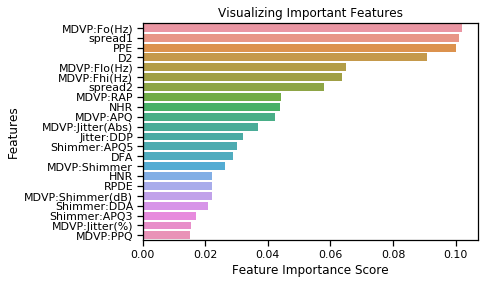

In [53]:
feature_imp = pd.Series(rfcl.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adding labels to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#The Fo(Hz), PPE and spread1 are the most impactful attributes for Random Forest Classifier

In [54]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50, max_samples=.7)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)
bgcl.score(X_test , y_test)

#With 90% accuracy of Bagging there is no improvement over RFC

0.8983050847457628

In [55]:
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[10  5]
 [ 1 43]]


In [56]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Bagging: {}'.format(count_misclassified))

Misclassified samples in Bagging: 6


In [57]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(X_train,y_train)
y_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

#AdaBoosting is a bit higher than Boosting but takes the accuracy down to 90% as compared to RF 
#hence not the model of choice 

0.8983050847457628

In [58]:
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[10  5]
 [ 1 43]]


In [59]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Ada Boosting: {}'.format(count_misclassified))

Misclassified samples in Ada Boosting: 6


In [60]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train,y_train)
y_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

#Gradient Boosting also gives the accuracy of 90% - still lower than RFC

0.8983050847457628

In [61]:
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[10  5]
 [ 1 43]]


In [62]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Gradient Boosting: {}'.format(count_misclassified))

Misclassified samples in Gradient Boosting: 6


In [63]:
#Of all the above ones Random Forest algorithm gave the maximum accuracy